In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
train_df = pd.read_csv("./train.csv")
validation_df = pd.read_csv("./valid.csv")

In [3]:
print("Number of instances in the train dataset:", train_df.shape[0])
print("Number of instances in the validation dataset:", validation_df.shape[0])

Number of instances in the train dataset: 45000
Number of instances in the validation dataset: 15000


In [4]:
train_df.sample(5)

,Id,Title,Body,Tags,CreationDate,Y
4572,36478906,What is the working logic of '==' while compar...,<p>What logic works when we compare two object...,<java>,2016-04-07 14:15:07,LQ_CLOSE
37905,54167571,Mysqli result while loop returns null,<p>This code used to work last time i checked ...,<php><arrays><mysqli><while-loop>,2019-01-13 09:29:42,LQ_CLOSE
6949,37822288,How to update S3 bucket with expire date using...,<p>I would like to update the S3 bucket with t...,<amazon-s3><aws-cli>,2016-06-14 21:18:16,HQ
39527,55464609,Monitor bluetooth peripheral state changes eve...,<p>At the moment I am using <code>CBCentralMan...,<c#><ios><swift><xamarin><xamarin.ios>,2019-04-01 22:46:25,LQ_CLOSE
40795,56509640,How to set custom highlighted state of SwiftUI...,<p>I have a Button. I want to set custom backg...,<swiftui>,2019-06-08 19:48:44,HQ


In [5]:
validation_df.sample(5)

,Id,Title,Body,Tags,CreationDate,Y
12336,53498721,How to handle regular expression,i have this list of data that needs to be pars...,<c++><c><regex><scanf>,2018-11-27 11:32:20,LQ_EDIT
4836,41059550,Fetch the part of a string and replace the str...,"I have a string as below.\r\n\r\n{{""sId"":""HSFJ...",<c#><json><regex>,2016-12-09 11:34:15,LQ_EDIT
12374,53565534,The Class-Path manifest attribute in [path] re...,<p>I am having a problem with Java 11/Spring B...,<java><maven><intellij-idea>,2018-11-30 22:05:28,HQ
14184,58041473,C++ count how many months until Oct without us...,How to count number of months from a given mon...,<c++><c++14>,2019-09-21 15:02:15,LQ_EDIT
4646,40853538,Accept only input in a certain range in bash,<p>I'm writing a quick bash script and I only ...,<linux><bash><shell>,2016-11-28 21:09:29,LQ_CLOSE


In [6]:
train_df.columns = [c.lower() for c in train_df.columns]
validation_df.columns = [c.lower() for c in validation_df.columns]

train_df.rename(columns={"y": "label"}, inplace=True)
validation_df.rename(columns={"y": "label"}, inplace=True)

In [7]:
train_df["label"] = train_df["label"].replace({"LQ_CLOSE": 0, "LQ_EDIT": 1, "HQ": 2}).astype(int)
validation_df["label"] = validation_df["label"].replace({"LQ_CLOSE": 0, "LQ_EDIT": 1, "HQ": 2}).astype(int)

C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_27988\4001089542.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["label"] = train_df["label"].replace({"LQ_CLOSE": 0, "LQ_EDIT": 1, "HQ": 2}).astype(int)
C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_27988\4001089542.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_df["label"] = validation_df["label"].replace({"LQ_CLOSE": 0, "LQ_EDIT": 1, "HQ": 2}).astype(int)


### Clean the data:

In [8]:
print("Number of missing titles in the train dataset:", train_df["title"].isnull().sum())
print("Number of missing titles in the validation dataset:", validation_df["title"].isnull().sum())

print("Number of missing bodies in the train dataset:", train_df["body"].isnull().sum())
print("Number of missing bodies in the validation dataset:", validation_df["body"].isnull().sum())

Number of missing titles in the train dataset: 0
Number of missing titles in the validation dataset: 0
Number of missing bodies in the train dataset: 0
Number of missing bodies in the validation dataset: 0


In [9]:
print("Number of missing labels in the train dataset:", train_df["label"].isnull().sum())
print("Number of missing labels in the validation dataset:", validation_df["label"].isnull().sum())

Number of missing labels in the train dataset: 0
Number of missing labels in the validation dataset: 0


In [10]:
print(f"Number of duplicated titles and bodies in the train dataset: {train_df[["title", "body"]].duplicated().sum()} ({train_df[["title", "body"]].duplicated().sum()/train_df.shape[0]:.2%})")
print(f"Number of duplicated titles and bodies in the validation dataset: {validation_df[["title", "body"]].duplicated().sum()} ({validation_df[["title", "body"]].duplicated().sum()/validation_df.shape[0]:.2%})")

Number of duplicated titles and bodies in the train dataset: 0 (0.00%)
Number of duplicated titles and bodies in the validation dataset: 0 (0.00%)


### Analyze distributions:

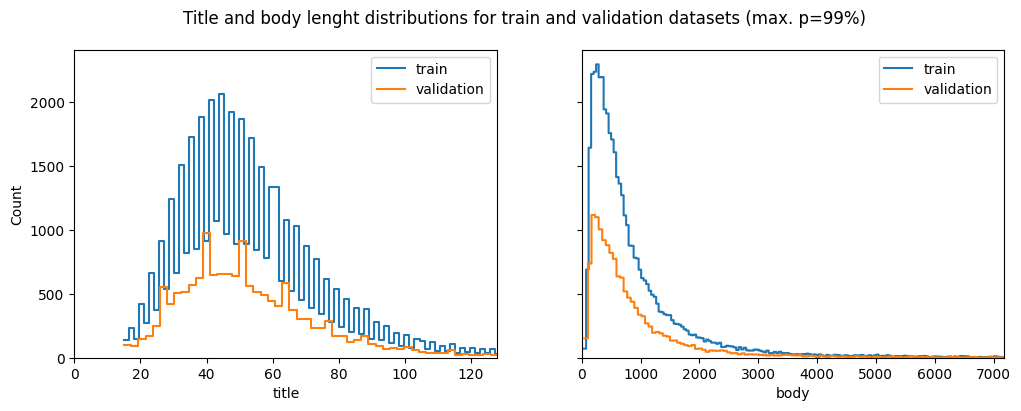

In [11]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.histplot(train_df["title"].str.len(), element="step", fill=False, ax=axes[0])
sns.histplot(validation_df["title"].str.len(), element="step", fill=False, ax=axes[0])
axes[0].set_xlim([
    0,
    pd.concat([
        train_df["title"].str.len(),
        validation_df["title"].str.len()
    ], axis=1, ignore_index=True).quantile(.99).max()
])
axes[0].legend(labels=["train", "validation"])
sns.histplot(train_df["body"].str.len(), element="step", fill=False, ax=axes[1])
sns.histplot(validation_df["body"].str.len(), element="step", fill=False, ax=axes[1])
axes[1].set_xlim([
    0,
    pd.concat([
        train_df["body"].str.len(),
        validation_df["body"].str.len()
    ], axis=1, ignore_index=True).quantile(.99).max()
])
axes[1].legend(labels=["train", "validation"])
plt.suptitle("Title and body lenght distributions for train and validation datasets (max. p=99%)")
plt.show()

In [13]:
label_stats = pd.concat([
    train_df["label"].value_counts(dropna=False, normalize=True),
    validation_df["label"].value_counts(dropna=False, normalize=True),
    pd.concat([train_df["label"], validation_df["label"]]).value_counts(dropna=False, normalize=True)
], axis=1)
label_stats.columns = ["train", "validation", "all"]
label_stats.round(2)

,train,validation,all
label,,,
0,0.33,0.33,0.33
2,0.33,0.33,0.33
1,0.33,0.33,0.33


### Prepare and persist datasets:

In [14]:
df = pd.concat([train_df, validation_df], ignore_index=True)

In [15]:
def concat(x):
    text = ""
    if x["title"] != "":
        text = x["title"]
    if x["body"] != "":
        if text != "":
            text += ".\n"
        text += x["body"]
    return text

df["text"] = df.apply(concat, axis=1)

In [16]:
print(f"Number of duplicated texts in the entire dataset: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts in the entire dataset: 0 (0.00%)


In [17]:
df[["id", "text", "label"]].to_parquet("./question_quality.parquet", index=False)

In [18]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 60000
